# Bike Sharing

## Data Exploration

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
day_data = pd.read_csv("C:/Users/Judit/Desktop/hw/Modell/bike+sharing+dataset/day.csv")
hour_data = pd.read_csv("C:/Users/Judit/Desktop/hw/Modell/bike+sharing+dataset/hour.csv")

In [3]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print(hour_data.shape)
print(hour_data.describe(include='all'))
print("\nMissing Values:\n", hour_data.isnull().sum())

(17379, 17)
           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2012-08-27           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersi

In [6]:
print(day_data.shape)
print(day_data.dtypes)
print(day_data.describe(include='all'))
print("\nMissing Values:\n", day_data.isnull().sum())

(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2012-12-29         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.0000

### Mapping

In [7]:
day_data_copy = day_data.copy()
day_data_copy.season = day_data_copy.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
day_data_copy.yr = day_data_copy.yr.map({0:'2011', 1:'2012'})
day_data_copy.mnth = day_data_copy.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
day_data_copy.weekday = day_data_copy.weekday.map({0:'Sunday', 1:'Monday', 2:'Tueday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
day_data_copy.weathersit = day_data_copy.weathersit.map({1:'Clear', 2:'Misty', 3:'Light Weather', 4:'Heavy Weather'})
day_data_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tueday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Visualization

### Seasonal Usage 

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

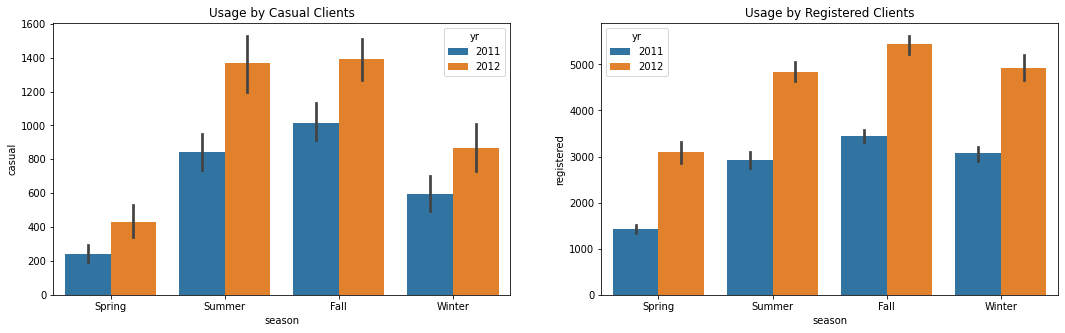

In [8]:
plt.figure(figsize=(18, 5))

#plt.subplot(1, 2, 1)
#sns.barplot('season', 'cnt', hue='yr', data=day_data_copy)
#plt.title('Usage by Season for All')

plt.subplot(1, 2, 1)
sns.barplot('season', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('season', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Comment: 
Significantly more registered clients are using the public bikes then not registered Clients. Trends on both year is similiar
Suprisingly Spring is a weak season on both side. And Winter has more registered users then summer. 

### Monthly Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

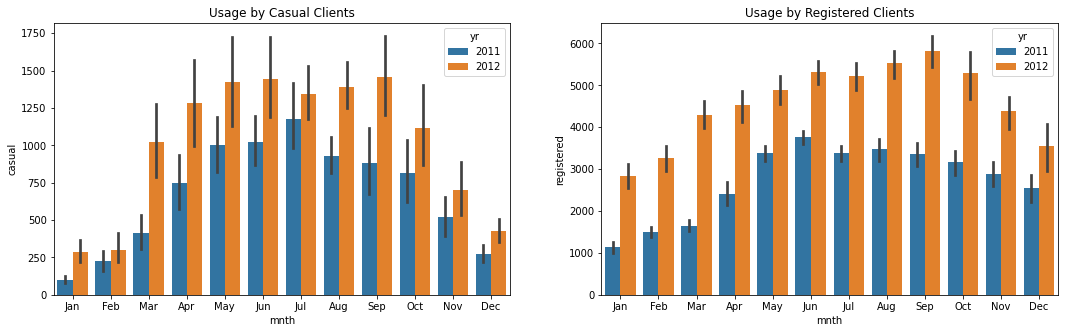

In [9]:
# Monthly Breakdown
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('mnth', 'casual', hue='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('mnth', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

### Weekday Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

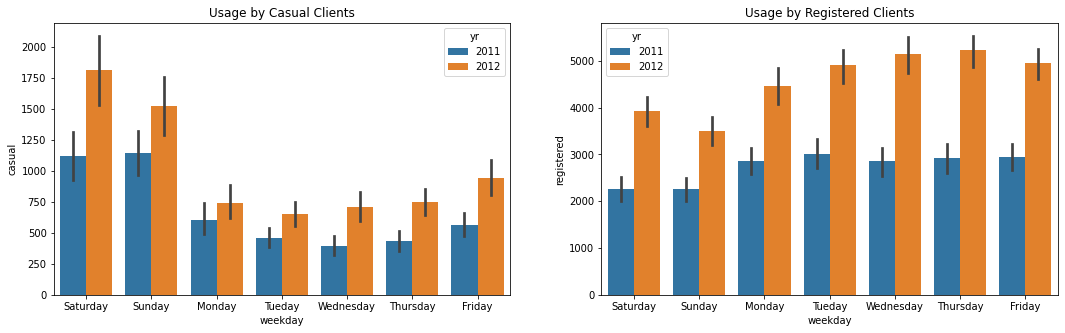

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('weekday', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('weekday', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Not registered Users : most probably using the bike not regualrly for example when they so some exploration in their free time on the weekend.
Registered Users: quite even usage, however workdays a little bit stronger then the weekends

Confirmed the theory above. 

### Workingday Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

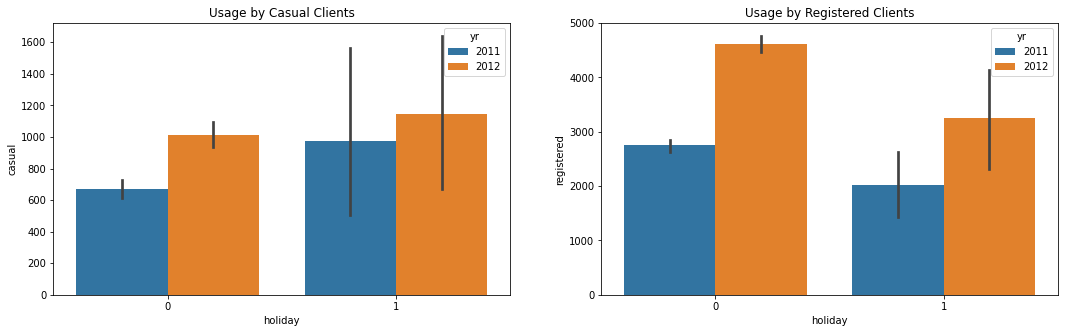

In [11]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('holiday', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('holiday', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Casual clients using the bikes not in regular times: like on holiday or weekends, 
Registered users are using in regular bases. 

### Weather Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

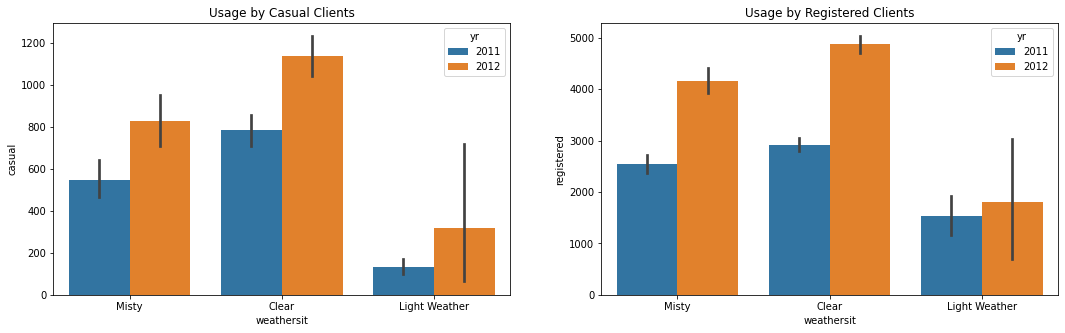

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('weathersit', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('weathersit', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Clients dont use the bikes when the weather is extremely bad. 
and as expected the most user eses bikes when the wether is nice. 

### Weather Correlation

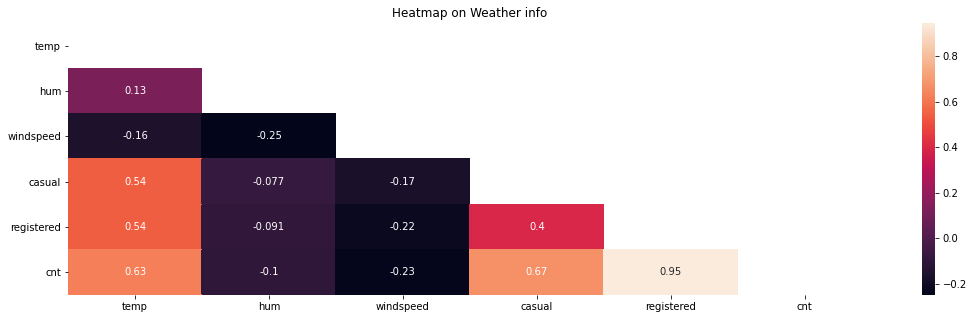

In [13]:
plt.figure(figsize = (18,5))

matrix = np.triu(day_data_copy[['temp','hum','windspeed','casual', 'registered', 'cnt']].corr())
sns.heatmap(day_data_copy[['temp','hum','windspeed','casual', 'registered', 'cnt']].corr(), annot = True, mask=matrix)
plt.title("Heatmap on Weather info")
plt.show()

The temp is the main correlation in usage. 

In [14]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Hourly Usage Average

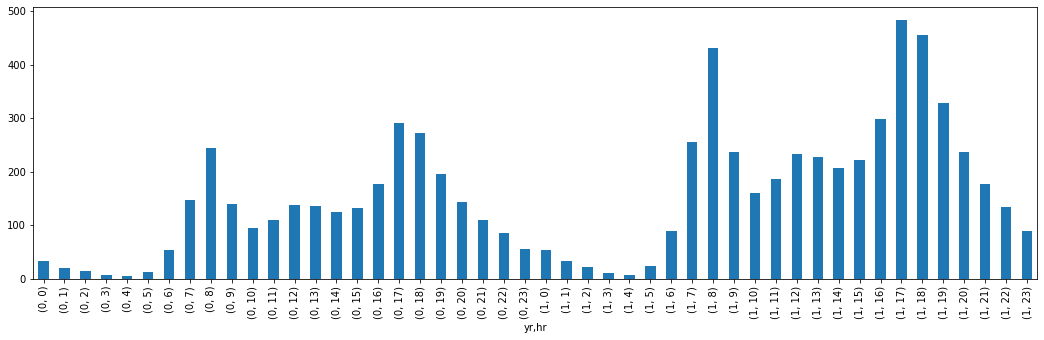

In [15]:
plt.figure(figsize=(18, 5))
registered_hour_data_avg = hour_data.groupby(['yr', 'hr'])['registered'].mean().plot(kind='bar')

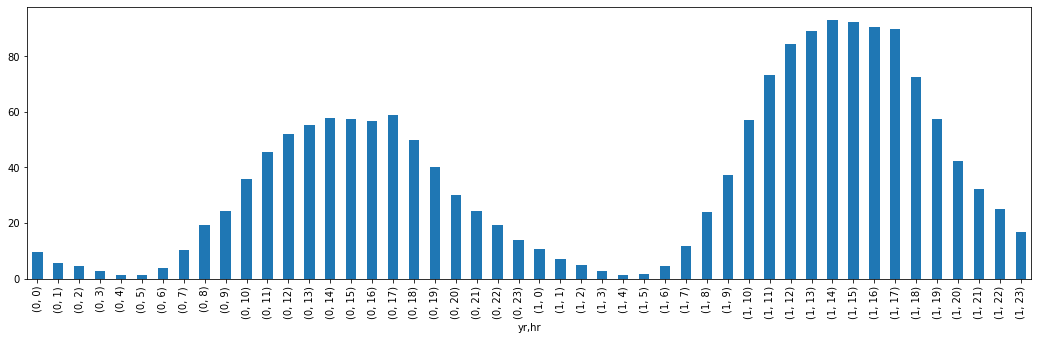

In [16]:
plt.figure(figsize=(18, 5))
casual_hour_data_avg = hour_data.groupby(['yr', 'hr'])['casual'].mean().plot(kind='bar')
#cnt_hour_data_avg = hour_data.groupby(['yr', 'hr'])['cnt'].mean()

For registered clients the the most usage is happening around 8 am and 17-18, when the user does to work/school.
For non registered users the most usage is happening between 10 and 19, for example sightseeing. 

# Reasearch Plan

## Goal

My goal within this project to predict registered and causal client number to the future, based on our 2011 and 2012 data. I already got fimiliar with the data. The data is pretty clean, I didnt had to handle missing data and invalid data at all. The temperature and other weather information already normaliized. After some visualization on different level, I discovered some trends and fun fact based on distributions, which will help to our study. 

## Data Preparation

The original data is clean, I didnt had to handle unusual or invalid data. For the model I have to create test and train dataset based on the original distribution. So for example for spring data the usage is pretty small, so when I create the test and train data sets, i have to make sure the ration between the seasons stays the same.

For test and train data generation I have to create a K-fold cross validation. This is a statistical method used to estimate the performance of a model by dividing the data into K subsets/folds. This technique helps in understanding how the model will generalize to an independent dataset. With this technique on test and training datasets, this method provides a more reliable estimate of model performance than a single train-test split.Considering we have limited data, as all the data points are used for both training and validation.

## Model Plan

Fot the modell I would like to create a linear regression mdoel from SkiKit Learn (compatible with RFE), our original data is in the state to use it directly. After split the data to trian and test data set (most probably the ration should be 70-30 or 20-80 %), I am going to creat a linear regression modell. Based on the model I will make a preidiction for the future. I would like to measure the accuary on the modell, for performance evaluation I will use Mean Square Error and R-squared measure.s 

# Model

In [17]:
day_data_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tueday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
months_df=pd.get_dummies(day_data_copy.mnth,drop_first=True)
weekdays_df=pd.get_dummies(day_data_copy.weekday,drop_first=True)
weathersit_df=pd.get_dummies(day_data_copy.weathersit,drop_first=True)
seasons_df=pd.get_dummies(day_data_copy.season,drop_first=True)

df_new = pd.concat([day_data_copy,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [19]:
df_new.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Saturday,Sunday,Thursday,Tueday,Wednesday,Light Weather,Misty,Spring,Summer,Winter
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,...,1,0,0,0,0,0,1,1,0,0
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,...,0,1,0,0,0,0,1,1,0,0
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,...,0,0,0,0,0,0,0,1,0,0
3,4,2011-01-04,Spring,2011,Jan,0,Tueday,1,Clear,0.200000,...,0,0,0,1,0,0,0,1,0,0
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,...,0,0,0,0,1,0,0,1,0,0


In [20]:
df_new = pd.concat([day_data_copy,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.drop(['instant','dteday'], axis = 1, inplace = True)
df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [21]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Saturday,Sunday,Thursday,Tueday,Wednesday,Light Weather,Misty,Spring,Summer,Winter
0,2011,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,...,1,0,0,0,0,0,1,1,0,0
1,2011,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,0,0,0,1,1,0,0
2,2011,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,2011,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,0,0,1,0,0,0,1,0,0
4,2011,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,0,0,0,1,0,0,1,0,0


In [22]:
#day_data_new = day_data.copy()
#day_data_new.drop(['instant','dteday'], axis = 1, inplace = True)
#day_data_new.head()

In [23]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)
df_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Saturday,Sunday,Thursday,Tueday,Wednesday,Light Weather,Misty,Spring,Summer,Winter
576,2012,0,1,0.730833,0.684987,0.668750,0.153617,1040,6065,7105,...,0,0,0,0,0,0,0,0,0,0
426,2012,0,1,0.353333,0.359842,0.657083,0.144904,246,2948,3194,...,0,0,0,0,0,0,1,1,0,0
729,2012,0,0,0.255833,0.231700,0.483333,0.350754,364,1432,1796,...,0,1,0,0,0,0,0,1,0,0
482,2012,0,1,0.457500,0.452637,0.400833,0.347633,1014,5219,6233,...,0,0,0,0,0,0,0,0,1,0
111,2011,0,1,0.336667,0.321954,0.729583,0.219521,177,1506,1683,...,0,0,0,0,0,0,1,0,1,0


In [24]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


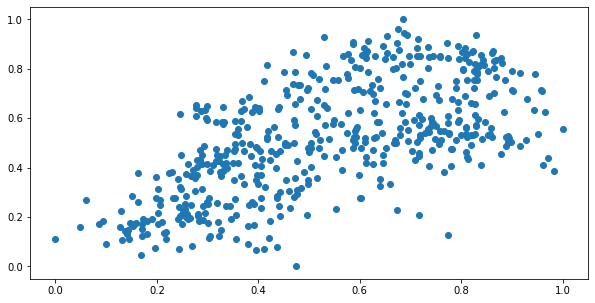

In [25]:
# positive correlation between cnt and temp


plt.figure(figsize=[10,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## RFE

In [26]:
# Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,Aug,...,Saturday,Sunday,Thursday,Tueday,Wednesday,Light Weather,Misty,Spring,Summer,Winter
576,2012,0,1,0.836974,0.795348,0.689137,0.239301,1040,6065,0,...,0,0,0,0,0,0,0,0,0,0
426,2012,0,1,0.366591,0.368552,0.677114,0.220569,246,2948,0,...,0,0,0,0,0,0,1,1,0,0
729,2012,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,0,...,0,1,0,0,0,0,0,1,0,0
482,2012,0,1,0.496388,0.490358,0.413052,0.656397,1014,5219,0,...,0,0,0,0,0,0,0,0,1,0
111,2011,0,1,0.345824,0.318819,0.751824,0.380981,177,1506,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
# Recursive feature  

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 6),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('Aug', False, 15),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 17),
 ('Jun', False, 7),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', False, 8),
 ('Oct', True, 1),
 ('Sep', False, 10),
 ('Monday', False, 9),
 ('Saturday', False, 14),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tueday', False, 11),
 ('Wednesday', False, 16),
 ('Light Weather', True, 1),
 ('Misty', False, 13),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', False, 3)]

In [30]:
col = X_train.columns[rfe.support_]
print(col)

Index(['workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'Dec', 'Feb', 'Jan', 'Mar', 'Oct', 'Light Weather',
       'Spring', 'Summer'],
      dtype='object')


In [31]:
X_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'Aug', 'Jul', 'Jun', 'May', 'Nov', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tueday', 'Wednesday', 'Misty',
       'Winter'],
      dtype='object')

In [32]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [33]:
X_train_rfe = X_train[col]
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,361.10
2,atemp,361.06
6,registered,15.92
3,hum,14.60
5,casual,9.78
0,workingday,8.64
13,Spring,7.06
4,windspeed,4.68
9,Jan,3.89
8,Feb,3.10


## Linear Regression Model

In [34]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.370e+30
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:06:37   Log-Likelihood:                 17303.
No. Observations:                 511   AIC:                        -3.457e+04
Df Residuals:                     495   BIC:                        -3.451e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0025    1.8e-16  -1.41e+13

In [35]:
# As temp shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,atemp,19.87
5,registered,15.91
2,hum,14.59
4,casual,9.62
0,workingday,8.56
12,Spring,7.05
3,windspeed,4.44
8,Jan,3.88
7,Feb,3.09
9,Mar,2.42


In [36]:
#2. reg modell
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.048e+30
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:06:37   Log-Likelihood:                 17274.
No. Observations:                 511   AIC:                        -3.452e+04
Df Residuals:                     496   BIC:                        -3.445e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0025    1.9e-16  -1.33e+13

In [37]:
# We can drop atemp variable as it has high p-value
#X_train_new = X_train_new.drop(['atemp'], axis = 1)

# Run the function to calculate VIF for the new model
#calculateVIF(X_train_new)

## Prediction

In [38]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Saturday,Sunday,Thursday,Tueday,Wednesday,Light Weather,Misty,Spring,Summer,Winter
184,2011,1,0,0.831783,0.769660,0.657364,0.084219,3065,2978,0.692706,...,0,0,0,0,0,0,1,0,0,0
535,2012,0,1,0.784017,0.755582,0.711035,0.227262,968,5857,0.782674,...,0,0,0,1,0,0,0,0,1,0
299,2011,0,1,0.511964,0.496145,0.837699,0.334206,240,2419,0.303382,...,0,0,1,0,0,0,1,0,0,1
221,2011,0,1,0.881625,0.795343,0.437098,0.339570,884,3896,0.547400,...,0,0,0,0,1,0,0,0,0,0
152,2011,0,1,0.817246,0.741471,0.314298,0.537414,736,4232,0.569029,...,0,0,1,0,0,0,0,0,1,0


In [39]:
X_train_lm_1

,const,workingday,temp,atemp,hum,windspeed,casual,registered,Dec,Feb,Jan,Mar,Oct,Light Weather,Spring,Summer
576,1.0,1,0.836974,0.795348,0.689137,0.239301,1040,6065,0,0,0,0,0,0,0,0
426,1.0,1,0.366591,0.368552,0.677114,0.220569,246,2948,0,0,0,1,0,0,1,0
729,1.0,0,0.245101,0.200348,0.498067,0.663106,364,1432,1,0,0,0,0,0,1,0
482,1.0,1,0.496388,0.490358,0.413052,0.656397,1014,5219,0,0,0,0,0,0,0,1
111,1.0,1,0.345824,0.318819,0.751824,0.380981,177,1506,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.820361,0.772142,0.698153,0.212561,1074,6506,0,0,0,0,0,0,0,0
53,1.0,1,0.202618,0.218747,0.435939,0.111379,139,1778,0,1,0,0,0,0,1,0
350,1.0,0,0.248216,0.223544,0.577930,0.431816,275,2464,1,0,0,0,0,0,0,0
79,1.0,1,0.462664,0.434043,0.759870,0.529881,401,1676,0,0,0,1,0,0,0,1


In [40]:
y_test = df_test.pop('cnt')
X_test = df_test

In [41]:
col1 = X_train_new.columns
X_test = X_test[col1]
X_test_lm_1 = sm.add_constant(X_test)

In [42]:
X_train_new

,workingday,atemp,hum,windspeed,casual,registered,Dec,Feb,Jan,Mar,Oct,Light Weather,Spring,Summer
576,1,0.795348,0.689137,0.239301,1040,6065,0,0,0,0,0,0,0,0
426,1,0.368552,0.677114,0.220569,246,2948,0,0,0,1,0,0,1,0
729,0,0.200348,0.498067,0.663106,364,1432,1,0,0,0,0,0,1,0
482,1,0.490358,0.413052,0.656397,1014,5219,0,0,0,0,0,0,0,1
111,1,0.318819,0.751824,0.380981,177,1506,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.772142,0.698153,0.212561,1074,6506,0,0,0,0,0,0,0,0
53,1,0.218747,0.435939,0.111379,139,1778,0,1,0,0,0,0,1,0
350,0,0.223544,0.577930,0.431816,275,2464,1,0,0,0,0,0,0,0
79,1,0.434043,0.759870,0.529881,401,1676,0,0,0,1,0,0,0,1


In [43]:
X_test_lm_1.drop(['const'], axis = 1, inplace = True)

In [44]:
y_pred = lr_1.predict(X_test_lm_1)

ValueError: shapes (220,14) and (16,) not aligned: 14 (dim 1) != 16 (dim 0)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

## Evaulation

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

In [ ]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()